<a href="https://colab.research.google.com/github/usmanjdn93/prog_ai_course/blob/main/Assignment_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("vaccination_all_tweets.csv")

data.shape


(228207, 16)

In [ ]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
data.isnull().sum()

,0
id,0
user_name,2
user_location,66911
user_description,17023
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0


<Axes: xlabel='user_verified', ylabel='count'>

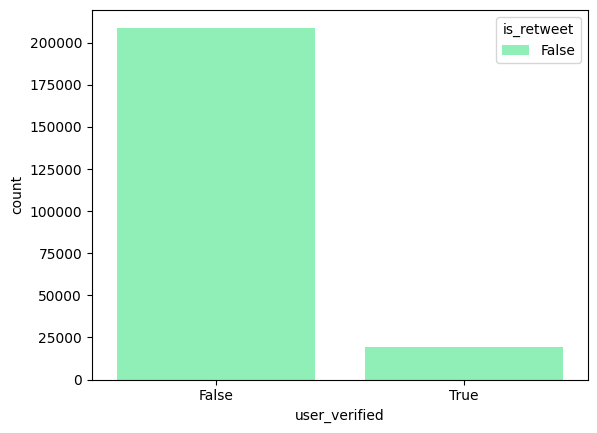

In [ ]:
sns.countplot(x='user_verified',hue='is_retweet',data=data,palette='rainbow')

In [ ]:
pip install vaderSentiment

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt


from wordcloud import WordCloud
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 2: Data Preprocessing
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, special characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"@\w+|#\w+", '', text)
    text = re.sub(r"[^A-Za-z\s]", '', text)
    text = text.lower()
    return text

# Apply preprocessing
# print(data['text'])
data['cleaned_text'] = data['text'].apply(preprocess_text)
print(data['cleaned_text'])




0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2                russian vaccine is created to last  years 
3         facts are immutable senator even when youre no...
4            explain to me again why we need a vaccine     
                                ...                        
228202        availability for  at pm\nfree slots \npaid...
228203        availability for  at pm\nfree slots \n  do...
228204        availability for  at pm\nfree slots \npaid...
228205    they promote their vaccines leaving out the st...
228206        availability for  at pm\nfree slots \npaid...
Name: cleaned_text, Length: 228207, dtype: object


In [ ]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

print(data['sentiment'])

0         positive
1         negative
2         positive
3          neutral
4          neutral
            ...   
228202    positive
228203    positive
228204    positive
228205    positive
228206    positive
Name: sentiment, Length: 228207, dtype: object


In [ ]:
# Step 3: Topic Modeling
# Define ColumnTransformer and Pipeline
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('lda', lda_model)
])

# Apply pipeline to cleaned text
data_subset = data['cleaned_text']
pipeline.fit(data_subset)

# Extract topics
def get_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_features)
    return topics

feature_names = vectorizer.get_feature_names_out()
print(feature_names)
topics = get_topics(lda_model, feature_names, 10)

print(topics)


# Output topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

['aap' 'aarthi' 'aayog' ... 'zombie' 'zone' 'zydus']
[['vaccination', 'vaccine', 'thanks', 'thank', 'covid', 'amp', 'dose', 'today', 'hospital', 'say'], ['vaccine', 'just', 'amp', 'good', 'ocgn', 'people', 'dont', 'like', 'vaccinated', 'know'], ['vaccine', 'use', 'approved', 'india', 'covid', 'approval', 'emergency', 'world', 'covaxin', 'children'], ['vaccine', 'moderna', 'covid', 'new', 'cases', 'pfizer', 'canada', 'ontario', 'reporting', 'vaccines'], ['age', 'slots', 'vaccinated', 'fully', 'hospital', 'apollo', 'crs', 'prs', 'covaxinrs', 'jayanagarcovaxinrs'], ['age', 'slots', 'dose', 'covaxin', 'pincode', 'date', 'fees', 'ages', 'sep', 'aug'], ['dose', 'got', 'shot', 'vaccine', 'second', 'nd', 'today', 'st', 'just', 'im'], ['doses', 'vaccine', 'vaccines', 'million', 'covid', 'received', 'india', 'chinese', 'batch', 'government'], ['dose', 'slots', 'free', 'availability', 'pm', 'paid', 'st', 'road', 'hospital', 'mumbai'], ['effective', 'dose', 'study', 'efficacy', 'data', 'vaccine', 

In [ ]:
# Step 4: Save Results
data.to_csv("processed_tweets.csv", index=False)


In [ ]:


df = pd.read_csv("processed_tweets.csv")

df.shape


<ipython-input-404-6f8369c1c1bb>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_tweets.csv")


(340790, 18)

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cleaned_text,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,same folks said daikon paste could treat a cyt...,positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,while the world has been on the wrong side of ...,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,russian vaccine is created to last years,positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,facts are immutable senator even when youre no...,neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain to me again why we need a vaccine,neutral


In [ ]:

# Remove rows where 'user_location' is null
df_cleaned = df.dropna(subset=['user_location'])

# Save the cleaned dataset to a new CSV file
output_path = 'processed_tweet_cleaned.csv'  # Specify your desired output file path
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

# Custom function to drop specified columns
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

df_cleaned.shape

Cleaned dataset saved to: processed_tweet_cleaned.csv


(176431, 18)

In [ ]:
df_cleaned.isnull().sum()

,0
id,0
user_name,1
user_location,0
user_description,6457
user_created,15130
user_followers,15130
user_friends,15130
user_favourites,15134
user_verified,15136
date,15134


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


# Remove rows where is null
df_cleaned = df.dropna(subset=['cleaned_text', 'source', 'hashtags', 'sentiment'])

df_cleaned.isnull().sum()


# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', ['user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'date', 'user_name', 'text']),
    ('source_encode', OneHotEncoder(handle_unknown='ignore'), ['source']),  # Use an instance of OneHotEncoder
    ('hashtags_encode', OneHotEncoder(handle_unknown='ignore'), ['hashtags']),  # Use an instance of OneHotEncoder
], remainder='drop')

# Split the dataset into features (X) and target variable (y)
y = df_cleaned['sentiment']
X = df_cleaned.drop('sentiment', axis=1)


# Create a complete pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing
    ('classifier', KNeighborsClassifier(n_neighbors=10))  # KNN Classifier
])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = pipeline.predict(X_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# # Evaluate the model using confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Assuming y_test and y_pred are the true and predicted labels
print(classification_report(y_test, y_pred))

(142756, 17)
(142756,)
(35689, 17)
(35689,)

Model Accuracy: 0.53
Confusion Matrix:
[[  838  3481  1473]
 [  430 12699  4056]
 [  269  6959  5484]]
              precision    recall  f1-score   support

    negative       0.55      0.14      0.23      5792
     neutral       0.55      0.74      0.63     17185
    positive       0.50      0.43      0.46     12712

    accuracy                           0.53     35689
   macro avg       0.53      0.44      0.44     35689
weighted avg       0.53      0.53      0.51     35689



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df_cleaned['cleaned_text']
Y = df_cleaned['sentiment']

print(X)
print(Y)

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_bow = vectorizer.transform(X_test)

# Output the shapes of the resulting Bag of Words matrices
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")

# Applying Random Forest Classifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
#accuracy_score(y_test,y_pred)


accuracy = accuracy_score(y_test,y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0         same folks said daikon paste could treat a cyt...
2                russian vaccine is created to last  years 
4            explain to me again why we need a vaccine     
6         it is a bit sad to claim the fame for success ...
7         there have not been many bright days in  but h...
                                ...                        
340785        availability for  at pm\nfree slots \npaid...
340786        availability for  at pm\nfree slots \n  do...
340787        availability for  at pm\nfree slots \npaid...
340788    they promote their vaccines leaving out the st...
340789        availability for  at pm\nfree slots \npaid...
Name: cleaned_text, Length: 178445, dtype: object
0         positive
2         positive
4          neutral
6         positive
7         positive
            ...   
340785    positive
340786    positive
340787    positive
340788    positive
340789    positive
Name: sentiment, Length: 178445, dtype: object
Shape of X_train_bow: (142756, 405

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))

X_train_n_gram = cv.fit_transform(X_train)
X_test_n_gram = cv.transform(X_test)

# Output the shapes of the resulting Bag of Words matrices
print(f"Shape of X_train_bow: {X_train_n_gram.shape}")
print(f"Shape of X_test_bow: {X_test_n_gram.shape}")

rf = RandomForestClassifier()

rf.fit(X_train_n_gram,y_train)
y_pred = rf.predict(X_test_n_gram)

print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

Shape of X_train_bow: (142756, 347243)
Shape of X_test_bow: (35689, 347243)


**Bert classification with 1000 records**

In [ ]:
!pip install --quiet tensorflow_text

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Load BERT preprocessing and encoding models from TensorFlow Hub
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3", trainable=False)

df = pd.read_csv("processed_tweets.csv")

# Use a smaller subset for testing (e.g., 10k rows)
df = df.sample(n=1000, random_state=42)

df.shape
# Remove rows where is null
df_cleaned = df.dropna(subset=['cleaned_text', 'source', 'hashtags', 'sentiment','user_location'])

df_cleaned.isnull().sum()

# Split the dataset into features (X) and target variable (y)
y = df_cleaned['sentiment']
X = df_cleaned['cleaned_text']

print(X)
print(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



def get_bert_embeddings_batchwise(texts, batch_size=1000):
    embeddings = []

    for i in range(0, len(texts), batch_size):
        print(texts, i)
        batch_texts = texts[i:i + batch_size]
        text_input = tf.constant(batch_texts)
        preprocessed_text = preprocessor(text_input)
        outputs = encoder(preprocessed_text)
        batch_embeddings = outputs['pooled_output']
        embeddings.append(batch_embeddings.numpy())  # Convert to numpy
    return np.vstack(embeddings)  # Stack all batches together

# Get BERT embeddings for training and test sets
train_embeddings = get_bert_embeddings_batchwise(X_train)
test_embeddings = get_bert_embeddings_batchwise(X_test)

print(train_embeddings.shape)
print(type(train_embeddings))

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(train_embeddings, y_train)

# Predict on the test set
y_pred = rf_model.predict(test_embeddings)

print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

<ipython-input-2-8725df486dc6>:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_tweets.csv")


193864       stadiums were empty \nwere doing their athl...
327808     receives another batch of  doses of chinadona...
201092    got my  of  the stiffness in the armlump was e...
17983     a total of  doses of s  vaccines donated by ch...
171338     for the nd shoot the experts say that this co...
                                ...                        
226410        availability for  at pm\nfree slots \n  do...
83151                       selling       contact sales  o 
68508     they werent lying about the second dose making...
187822                            risks of  with  and   \n 
34914     get yours if you are eligible as soon as you c...
Name: cleaned_text, Length: 354, dtype: object
193864    positive
327808    positive
201092     neutral
17983      neutral
171338    positive
            ...   
226410    positive
83151      neutral
68508     negative
187822    negative
34914      neutral
Name: sentiment, Length: 354, dtype: object
41350      embarrassing ontario is repor

# **Sentiment Analysis (Text Classification using BERT) **
*   **Text Cleaning**
*   **BERT Model (Feature Engineering)**
*   **Model**

In [ ]:
df = pd.read_csv("processed_tweets_with_cleaned_text.csv", nrows=100)
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [ ]:
labels = [label for label in dataset.features.keys() if label not in ['id', 'user_name','user_location', 'user_created','','favorites','user_followers','user_friends','user_verified','retweets','is_retweet','user_description','date','hashtags','source','text','user_favourites','first_hashtag','user_folloers','cleaned_text','sentiment','AstraZeneca','Pfizer','Moderna','AstroZenca','Johnson','Sputnik']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['positive', 'negative', 'neutral']

In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):

  text = examples["cleaned_text"]
  # encode them
  print(text)
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  print(encoding)
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  print(labels_batch)
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  print(labels)
  for idx, label in enumerate(labels):
    print(idx,label)
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset.column_names)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

['same folks said daikon paste could treat a cytokine storm  ', '      russian vaccine is created to last  years ', 'explain to me again why we need a vaccine     ', 'it is a bit sad to claim the fame for success of  on patriotic competition between usa canada uk and ', 'there have not been many bright days in  but here are some of the best \n  winning  ', 'covid vaccine you getting it\n\n    ', ' \n\nstates will start getting  monday  says \n    ', 'while deaths are closing in on the  mark millions of people wait   \n\nthe first u ', '           best wishes to the us ', 'for all the women and healthcare providers who have been asking about the safety of the  ', 'trump announces  rollout in less than  hours\n\nthe first americans will be vaccinated against ', 'updated  amp    part two\n\n    ', 'coronavirus iran reports  new cases  deaths in the last  hours    ', ' will rake in billions from its expensive  but  refuses to cut the price for lowe ', 'the trump administration failed to de

In [ ]:
example = encoded_dataset[0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] same folks said daikon paste could treat a cytokine storm [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['positive']

In [ ]:
encoded_dataset.set_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
batch_size = 8
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset[0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['input_ids'][0]

tensor([  101,  2168, 12455,  2056, 18765, 19648, 19351,  2071,  7438,  1037,
        22330, 18715,  3170,  4040,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['input_ids'][0].unsqueeze(0), labels=encoded_dataset[0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.5463, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[ 0.4584, -0.4930, -0.0423]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset,
    eval_dataset=encoded_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.571469,0.622222,0.720000,0.490000
2,No log,0.506844,0.786885,0.832500,0.710000
3,No log,0.462145,0.845361,0.880000,0.810000
4,No log,0.426160,0.860000,0.895000,0.840000
5,No log,0.415600,0.881188,0.912500,0.870000


TrainOutput(global_step=65, training_loss=0.5230330247145433, metrics={'train_runtime': 1389.8075, 'train_samples_per_second': 0.36, 'train_steps_per_second': 0.047, 'total_flos': 32889177216000.0, 'train_loss': 0.5230330247145433, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.4156002402305603,
 'eval_f1': 0.8811881188118812,
 'eval_roc_auc': 0.9125000000000001,
 'eval_accuracy': 0.87,
 'eval_runtime': 43.9273,
 'eval_samples_per_second': 2.276,
 'eval_steps_per_second': 0.296,
 'epoch': 5.0}

In [ ]:
text = "I'm very very happy I finally got dose"

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
logits = outputs.logits
logits.shape

torch.Size([1, 3])

In [ ]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
print(probs)
predictions[np.where(probs >= 0.5)] = 1
# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

tensor([0.5456, 0.1654, 0.4402], grad_fn=<SigmoidBackward0>)
['positive']
